In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv("data/bikes.csv", index_col = 0 )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [4]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
396,397,01-02-2019,spring,1,2,0,3,1,1,19.235847,23.32690,50.7917,12.667489,304,4275,4579
281,282,09-10-2018,winter,0,10,0,0,0,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
119,120,30-04-2018,summer,0,4,0,6,0,1,19.372500,23.20105,50.3333,15.750025,1965,3347,5312
100,101,11-04-2018,summer,0,4,0,1,1,2,24.421732,28.26085,71.6956,21.739758,855,2493,3348
595,596,19-08-2019,autumn,1,8,0,0,0,2,26.069153,30.17770,71.1667,5.792150,1208,3341,4549


- En la columna yr, el 0 hace referencia a 2018 y el 1 2019 ---> cambiar a 2018 y 2019
- Revisar estaciones segun meses - NO HECHO - Revisar para hacer la función con diccionario - día específico de la semana 😒
- Los dias de la semana pasarlos a str (texto)
- Redondear temperaturas
- Cambiar dteday a tipo daytime
- Comprobar festivos - columna holiday - 16 días
- Los dias de la semana no corresponden con los que debieran ser 🤦‍♀️🤦‍♀️
- librería prophet - solo festivos nacionales 👁️ hacer otro entorno
- Librería calendar - dia de la semana

Weathersit :
- 1: Sol y nubes
- 2: Niebla - nublado
- 3: Regulinchi
- 4: Tiempo chungo

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(730, 16)

In [8]:
primavera = df[df['season']=='spring'] #Primavera 20 marzo - 21 junio
primavera['mnth'].unique()

array([ 1,  2,  3, 12])

In [12]:
invierno = df[df['season']=='winter'] # Invierno 21 de diciembre - 20 de marzo
invierno['mnth'].unique()

array([ 9, 10, 11, 12])

In [13]:
#Verano 21 junio - 23 septiembre 
verano = df[df['season']=='summer'] 
verano['mnth'].unique()

array([3, 4, 5, 6])

In [14]:
#Otoño 23 septiembre - 21 de diciembre
otoño = df[df['season']=='autumn'] 
otoño['mnth'].unique()

array([6, 7, 8, 9])

In [19]:
#Hacemos una función para reasignar correctamente los meses con las estaciones

def estaciones(col):
    #diccionario = {'winter': [1, 2, 3], 'spring': [4, 5, 6]}
    if col == 1:
        return 'winter'
    elif col == 2:
        return 'winter'
    elif col == 3:
        return 'winter'
    elif col == 4:
        return 'spring'
    elif col == 5:
        return 'spring'
    elif col == 6:
        return 'spring'
    elif col == 7:
        return 'summer'
    elif col == 8:
        return 'summer'
    elif col == 9:
        return 'summer'
    elif col == 10:
        return 'autumn' 
    elif col == 11:
        return 'autumn'
    else:
        return 'autumn'

In [20]:
df['seasons_ok'] = df['mnth'].apply(estaciones)

In [21]:
df['seasons_ok'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [25]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_ok
573,574,28-07-2019,autumn,1,7,0,6,0,1,30.989153,34.88020,61.3333,10.542450,2234,4451,6685,summer
654,655,17-10-2019,winter,1,10,0,3,1,1,18.689153,22.50540,69.2917,6.791857,979,6482,7461,autumn
644,645,07-10-2019,winter,1,10,0,0,0,2,17.049153,20.99065,70.8333,9.457854,781,2729,3510,autumn
525,526,10-06-2019,summer,1,6,0,0,0,1,29.793347,33.17585,53.8333,8.959307,2224,4374,6598,spring
557,558,12-07-2019,autumn,1,7,0,4,1,1,29.349153,32.73415,52.9583,9.833925,1032,6414,7446,summer


In [15]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
festivos = df[df['holiday']== 1]

In [18]:
festivos

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2018,spring,0,1,1,1,0,2,7.209153,8.83855,53.7500,12.999139,117,883,1000
51,52,21-02-2018,spring,0,2,1,1,0,2,12.436653,14.20375,60.5000,20.625682,195,912,1107
104,105,15-04-2018,summer,0,4,1,5,0,1,18.313347,22.09565,67.1250,15.167125,642,2484,3126
149,150,30-05-2018,summer,0,5,1,1,0,1,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
184,185,04-07-2018,autumn,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
247,248,05-09-2018,autumn,0,9,1,1,0,2,27.606653,31.28230,79.0417,14.250632,1236,2115,3351
282,283,10-10-2018,winter,0,10,1,1,0,1,23.404153,27.14625,73.3750,2.834381,1514,3603,5117
314,315,11-11-2018,winter,0,11,1,5,0,1,13.290847,15.34085,44.6250,21.083225,440,2928,3368
327,328,24-11-2018,winter,0,11,1,4,0,1,15.306653,18.62355,54.9167,11.209368,560,935,1495
359,360,26-12-2018,spring,0,12,1,1,0,1,13.191299,15.77675,50.6957,16.044155,430,887,1317


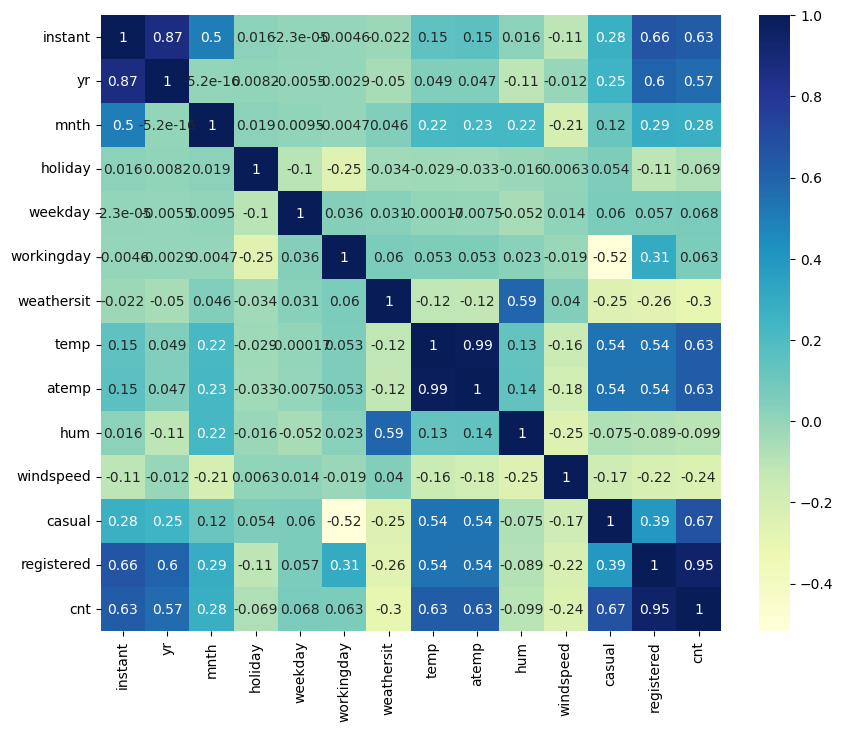

In [28]:

sns.heatmap(df.corr(), 
            cmap = "YlGnBu", 
           annot = True);